# Imersão Python Do Excel à Análise de Dados

### Sirie Temporal

Imports

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

d:\PROJETOS\Imersão-Python-Excel -Análise-Dados\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Codigo

In [2]:
empresa = 'AMD'
dados = yf.download(empresa, start='2023-01-01', end='2024-12-31', progress=False)
dados = dados.reset_index()

In [3]:
dados_treino = dados[dados['Date'] < '2024-01-01']
dados_teste = dados[dados['Date'] >= '2024-01-01']

In [4]:
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date':'ds','Close':'y'})

In [5]:
modelo = Prophet(weekly_seasonality=True,
                 yearly_seasonality=True,
                 daily_seasonality=False)

modelo.add_country_holidays(country_name='US')
modelo.fit(dados_prophet_treino)

00:40:50 - cmdstanpy - INFO - Chain [1] start processing
00:40:52 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
futuro = modelo.make_future_dataframe(periods=182)
previsao = modelo.predict(futuro)

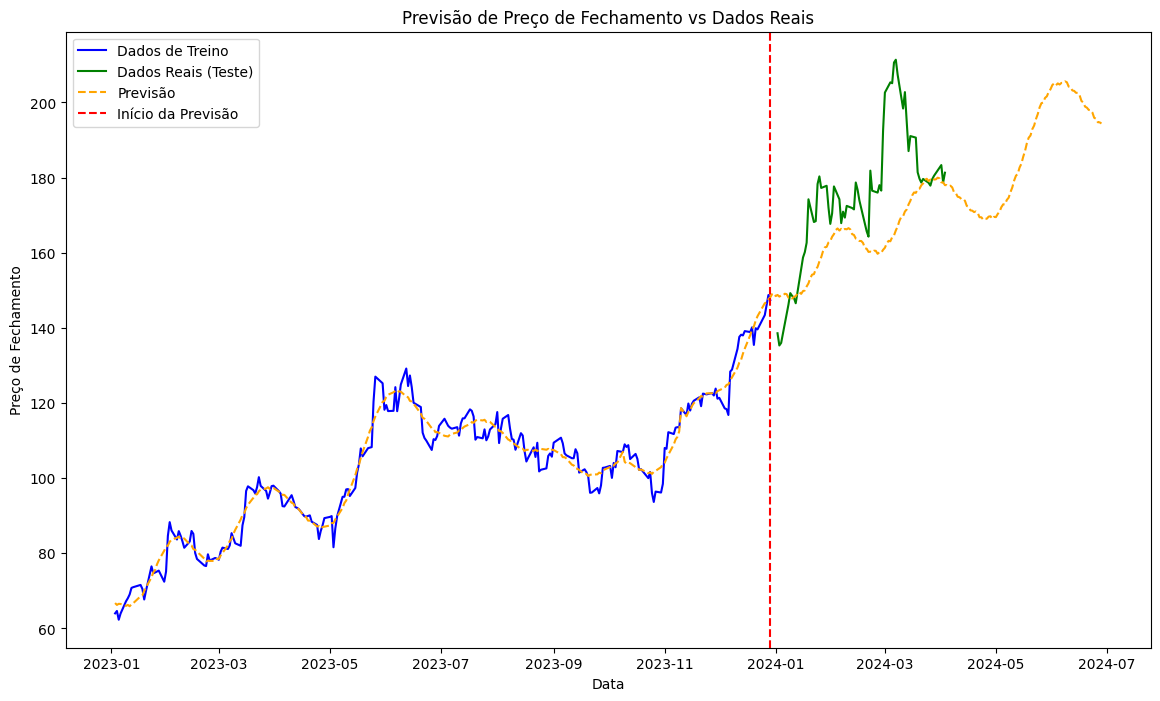

In [7]:
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()